In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mysolver as solver

# Damped Oscillation

In [12]:
def oscillator(y,t, lam, K, M):
        '''
        This is the function (osci) defined in the [position, velocity] 
        and [derivative(position), derivative(velocity)]
        :param y: [position, velocity]
        :param k: spring constants
        :param m: mass constant
        '''

        yder =  np.zeros(2)
        yder[0] = y[1]
        yder[1] = -y[0] * K/M - y[1] * lam / M # the difinition of the acceleration, which is depend on the position.
        
        return yder

In [13]:
N, t = int(10e2), 20 # divided into 100
dt = t/N

M, K = 1, 1
A = 1
lam = 0.2
phi = - np.pi/2
r = lam/(2 * M)
w0 = np.sqrt(K/M)
w = np.sqrt(abs(np.square(w0) - np.square(r)))

y0  = np.zeros(2)
y0[0]= 0 # initial position
y0[1] = -A * r * np.cos(phi) - A * w * np.sin(phi)

x = np.linspace(0, t, N) # from 0 to t divided by N+1, i.e., N+1 equal parts.

In [14]:
sol1 = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, K, M))[0]
sol2 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, K, M))[0]
sol3 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, K, M))[0]

# Analytical Solution

In [15]:
# Calculate analytical solution here
sol  = A * np.exp(-r * x) * np.cos(w*x + phi)
sol_v = -A * np.exp(-r * x) * (r * np.cos(w*x + phi) + w * np.sin(w*x + phi))

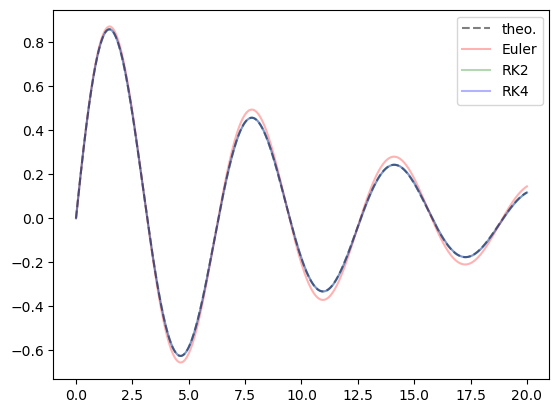

In [16]:
# Visualize your solution here
plt.plot(x, sol, "k--", label = "theo.", alpha = 0.5)
plt.plot(x, sol1, "r", label = "Euler", alpha = 0.3)
plt.plot(x, sol2, "g", label = "RK2", alpha = 0.3)
plt.plot(x, sol3, "b", label = "RK4", alpha = 0.3)
plt.legend()